In [3]:
import pandas as pd


In [4]:
df = pd.read_csv('ads.csv')

# data profiling and inspection

In [5]:
df.head()

Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

In [6]:
df

Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]

In [5]:
df.describe()

Unnamed: 0          TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
#checking if there are any missing values.

In [8]:
df.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [13]:
# we can drop the column unnamed:0 because it is just count of the records.
df.drop(columns=['Unnamed: 0'],inplace=True)

In [14]:
df.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [9]:
# we can see there are not any missing data in the dataset.

# Feature selection using correlation

# one feature selection

<Axes: >

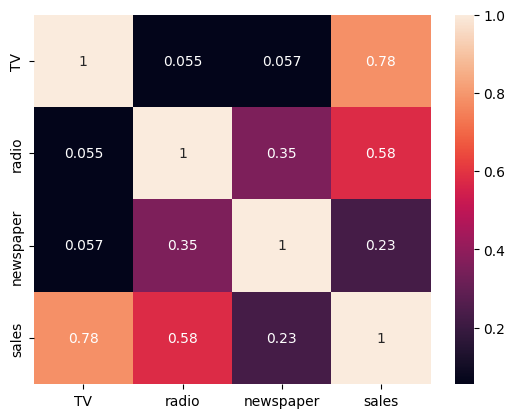

In [16]:
sns.heatmap(df.corr(),annot=True)

* sales has positive correlation with newspaper,radio and tv.
* The independent variables(newspaper,radio,tv) also has positive correlation with each other.
* The assumption of linear regression suggest that the independent variable should not be correlated. if they are correlated it is a problem of multi-colinarity. In such case we should drop one column.
* Here independent variable TV has strong correlation with sales i.e 0.78 so we will use only this variable for one feature selection and other independent variable are left out.

In [17]:
# selecting features.

In [91]:
X = df[['TV']]
y = df.sales

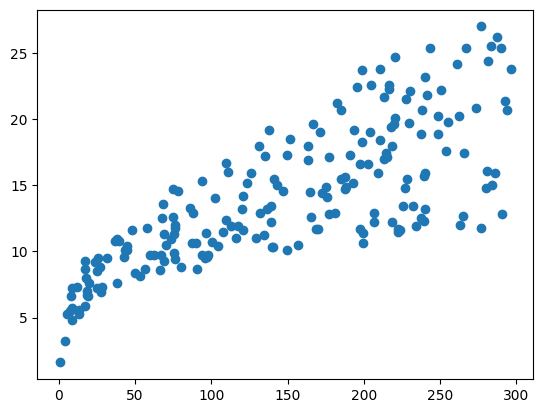

In [22]:
import matplotlib.pyplot as plt
plt.scatter(x=X,y=y)

# now making train test split

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

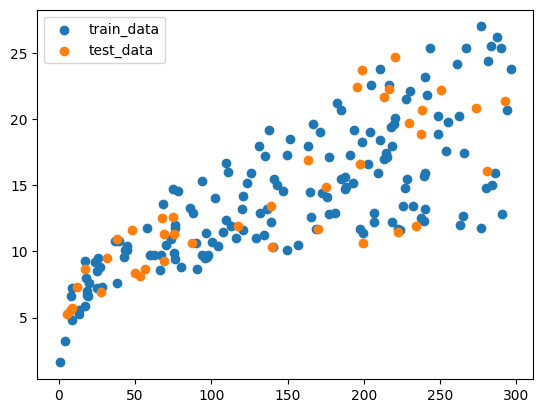

In [93]:
plt.scatter(x=X_train,y=y_train,label='train_data')
plt.scatter(x=X_test,y=y_test,label='test_data')
plt.legend()
plt.show()

In [39]:
# now sketching the best fit line.

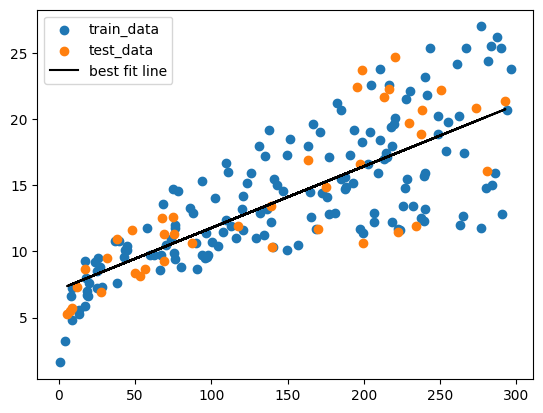

In [94]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
plt.scatter(X_train,y_train,label='train_data')
plt.scatter(X_test,y_test,label='test_data')
plt.plot(X_test,y_pred,label='best fit line',color='black')
plt.legend()
plt.show()

In [35]:
# now checking the evaluation metrics to check whether the model has accuracy or not.


In [95]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
MSE = mean_squared_error(y_true = y_test , y_pred = y_pred)
MAE = mean_absolute_error( y_true = y_test , y_pred = y_pred)
r2_score = r2_score(y_true = y_test,y_pred = y_pred)
print(f"MSE={MSE}")
print(f"MAE={MAE}")
print(f"r2score={r2_score}")

MSE=10.204654118800956
MAE=2.444420003751042
r2score=0.6766954295627076


* here r2_score is 0.6766 means it has 67.66% accuracy.

# now lets say we have put 500 ads in tv then what will be the sales?

In [96]:
model.predict([[500]])

/home/bikash/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([30.38450528])

* 500 adds were given in tv and we have sales of 30 products

In [97]:
model.predict([[44.5]])

/home/bikash/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.19021158])

In [98]:
df.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

# Radio and newspaper add also might affect the sales so we use multiple features now. 

# multiple feature selection

In [103]:
X = df[['TV','newspaper','radio']]
y = df.sales

In [102]:
X

TV  newspaper  radio
0    230.1       69.2   37.8
1     44.5       45.1   39.3
2     17.2       69.3   45.9
3    151.5       58.5   41.3
4    180.8       58.4   10.8
..     ...        ...    ...
195   38.2       13.8    3.7
196   94.2        8.1    4.9
197  177.0        6.4    9.3
198  283.6       66.2   42.0
199  232.1        8.7    8.6

[200 rows x 3 columns]

In [104]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [64]:
X.head()

TV  newspaper  radio
0  230.1       69.2   37.8
1   44.5       45.1   39.3
2   17.2       69.3   45.9
3  151.5       58.5   41.3
4  180.8       58.4   10.8

In [65]:
# training the model again


In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size =0.2,random_state=42)

In [107]:
X_train

TV  newspaper  radio
79   116.0       23.1    7.7
197  177.0        6.4    9.3
38    43.1       35.1   26.7
24    62.3       18.3   12.6
122  224.0       15.6    2.4
..     ...        ...    ...
106   25.0       29.7   11.0
14   204.1       46.0   32.9
92   217.7       59.0   33.5
179  165.6       17.6   10.0
102  280.2       21.4   10.1

[160 rows x 3 columns]

In [113]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
MSE = mean_squared_error(y_true = y_test , y_pred = y_pred)
MAE = mean_absolute_error( y_true = y_test , y_pred = y_pred)
r2_score = r2_score(y_true = y_test,y_pred = y_pred)
print(f"MSE={MSE}")
print(f"MAE={MAE}")
print(f"r2score={r2_score}")

MSE=3.1740973539761046
MAE=1.4607567168117606
r2score=0.899438024100912


# using multiple feature selection our accuracy has also been increased and error has also decreased.
* we get 89.94% accuracy

# now lets say the we put 500 ads in tv like in single feature selection, 200 add in radio and 100 ads in newspaper.what will be the sales ?

In [115]:
model.predict([[500,200,100]])

/home/bikash/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([44.81555436])

In [116]:
df.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [118]:
model.predict([[44.5,39.3,45.1]])

/home/bikash/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.61073961])

# linear models are likely to overfit. so we use regularization technique to avoid overfitting in models.

# Lasso 

In [120]:
x = df[['TV','newspaper','radio']]
y=df.sales
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size =0.2,random_state=40)
from sklearn.linear_model import Lasso
model= Lasso()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
mse=mean_squared_error(y_true=Y_test,y_pred=y_pred)
mae=mean_absolute_error(y_true=Y_test,y_pred=y_pred)
r2=r2_score(y_true=Y_test,y_pred=y_pred)
print(f"mse = {mse}")
print(f"mae = {mae}")
print(f"r2_score = {r2}")

mse = 5.4793676758031875
mae = 1.578482866797795
r2_score = 0.8006501836652742


In [121]:
model.predict([[44.5,39.3,45.1]])

/home/bikash/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([13.78511199])

# using ridge regularization

In [124]:
x = df[['TV','newspaper','radio']]
y=df.sales
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size =0.2,random_state=40)
from sklearn.linear_model import Ridge
model= Ridge()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
mse=mean_squared_error(y_true=Y_test,y_pred=y_pred)
mae=mean_absolute_error(y_true=Y_test,y_pred=y_pred)
r2=r2_score(y_true=Y_test,y_pred=y_pred)
print(f"mse = {mse}")
print(f"mae = {mae}")
print(f"r2_score = {r2}")

mse = 5.544836022864703
mae = 1.579570734349376
r2_score = 0.7982683206959238


In [125]:
model.predict([[44.5,39.3,45.1]])

/home/bikash/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([13.87862882])

# using elastic net

In [126]:
x = df[['TV','newspaper','radio']]
y=df.sales
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size =0.2,random_state=40)
from sklearn.linear_model import ElasticNet
model= ElasticNet()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
mse=mean_squared_error(y_true=Y_test,y_pred=y_pred)
mae=mean_absolute_error(y_true=Y_test,y_pred=y_pred)
r2=r2_score(y_true=Y_test,y_pred=y_pred)
print(f"mse = {mse}")
print(f"mae = {mae}")
print(f"r2_score = {r2}")

mse = 5.50332219627178
mae = 1.5771504185872844
r2_score = 0.799778672655548
